# Scikit-learn - Topic 7 - Cross Validation Search (GridSearchCV) and Hyperparameter Optimisation - Multiple algorithms


## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%202%20-%20Unit%20Objective.png"> Topic Objectives


* Do Hyperparameter Optimisation using multiple algorithms. 
## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%204%20-%20Import%20Package%20for%20Learning.png"> Import Packages for Learning




---


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


---


## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Scikit-learn - Topic 7 - Cross Validation Search (GridSearchCV) and Hyperparameter Optimisation


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> Good job! You fitted multiple pipelines using a single algorithm while looking for the best hyperparameter combination for regression and classification tasks. However, how do you know which was better for a given ML task? 
* Let's learn how to use GridSearchCV and do Hyperparameter Optimisation using **multiple algorithms**
<img width="3%" height="3%" align="top"  src=" https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Challenge%20test.png
">
 We will cover in this notebook:
* A technique to do a hyperparameter optimisation with multiple algorithms.
* A strategy for using this technique that typically reduces the time needed to train all algorithms.
* A strategy to refit the pipeline with only the most relevant features so you can deploy a pipeline that contains only the best features.
* **BONUS**: Here, we list the values of the most common hyperparameters for the algorithms we have covered in the course. You can use them as a starting point and as a reference for your personal projects or in your future workplace.
---


### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png">  Hyperparameter Optimisation with multiple algorithms


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> We are going to consider a similar workflow to the one we studied earlier:

* Split the data.
* Define the pipeline and hyperparameter.
* Fit the pipeline (using a strategy that typically trains all the algorithms faster).
* Evaluate the pipeline.
<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%206%20-%20Warning.png"> The exercise we are conducting in this notebook is specifically for a multiclassification task but extends to regression and binary tasks. The concepts we cover here are also applicable to these other tasks.
<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> We will use the 'penguins' dataset for this exercise. It has records for three different species of penguins collected from three islands in the Palmer Archipelago, Antarctica. 
* Here, we are interested in predicting the species of a given penguin.


In [4]:
df_clf = sns.load_dataset('penguins')
print(df_clf.shape)
df_clf.head()


(344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


We split the data into train and test sets.


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(
                                    df_clf.drop(['species'],axis=1),
                                    df_clf['species'],
                                    test_size=0.2,
                                    random_state=101
                                    )

print("* Train set:", X_train.shape, y_train.shape, "\n* Test set:", X_test.shape, y_test.shape)


* Train set: (275, 6) (275,) 
* Test set: (69, 6) (69,)


<img width="3%" height="3%" align="top"  src=" https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Challenge%20test.png
">
 And define the pipeline steps considering:
* data cleaning (median imputation, categorical imputation).
* feature engineering (categorical encoding).
* feature scaling.
* feature selection (note we don't specify the algorithm, we pass in a variable called `model`).
*  and modelling (note we don't specify the algorithm, we pass in a variable called `model`).


<img width="3%" height="3%" align="top"  src=" https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Tips.png
"> Previously, we covered the definition of data cleaning and feature-engineering/scaling/selection steps, and in this exercise, we provide the appropriate actions (imputations and encoding).


In [6]:
from sklearn.pipeline import Pipeline

### Data Cleaning and Feature Engineering
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import CategoricalImputer
from feature_engine.encoding import OrdinalEncoder

### Feat Scaling
from sklearn.preprocessing import StandardScaler

### Feat Selection
from sklearn.feature_selection import SelectFromModel

### ML algorithms 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier


def PipelineOptimization(model):
  pipeline_base = Pipeline([
      ( 'median',  MeanMedianImputer(imputation_method='median',
                                     variables=['bill_length_mm' , 'bill_depth_mm',
                                                'flipper_length_mm', 'body_mass_g']) ),

      ( 'categorical_imputer', CategoricalImputer(imputation_method='frequent',
                                                        variables=['sex']) ),

      ( "ordinal",OrdinalEncoder(encoding_method='arbitrary', 
                                 variables = ['island', 'sex']) ), 

      ("feat_scaling", StandardScaler() ),

      ("feat_selection",  SelectFromModel(model) ),

      ("model", model ),


    ])

  return pipeline_base



<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Next, we create a Python class (HyperparameterOptimizationSearch) which aims to fit a set of algorithms with multiple hyperparameters. The logic is: 
* The developer defines a set of algorithms and their respective hyperparameter values.
* The code iterates on each algorithm and fits pipelines using GridSearchCV considering their respective hyperparameter values. The result is stored. 
* That is repeated for all algorithms that the user listed.
* Once all pipelines are trained, the developer can retrieve a list with a performance result summary and an object that contains all the trained pipelines. The developer can then subset the best pipeline.



<img width="3%" height="3%" align="top"  src=" https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Steps.png
"> Let's explain the major parts of the Python class.

* In the \__init__ method, you pass in models and params as a dictionary of algorithms and their respective hyperparameters.
* In the `fit` method, we loop on each algorithm and pass the algorithm to PipelineOptimization(). As a result, it will do a grid search on a set of hyperparameters for that given model. The result is stored, and the loop continues.
* The `score_summary` method returns all pipelines and a DataFrame with a performance summary for all of the algorithms.

<img width="3%" height="3%" align="top"  src=" https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Tips.png
"> Again, at first, it will take some time to understand the code of this class, but what's most important for now is to understand what it does. 




In [7]:
from sklearn.model_selection import GridSearchCV
class HyperparameterOptimizationSearch:

    def __init__(self, models, params):
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv, n_jobs, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print(f"\nRunning GridSearchCV for {key} \n")
            model = PipelineOptimization(self.models[key])

            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs, verbose=verbose, scoring=scoring)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns], self.grid_searches


<img width="3%" height="3%" align="top"  src=" https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Steps.png
">
 We now define a list of models and their respective hyperparameters. 
* The first dictionary is related to the algorithms.
  * We create a dictionary where the key is the model name (you can use any name here, but we suggest using the estimator name), and the value is the estimator object. For example, for the decision tree, we use DecisionTreeClassifier(random_state=0).
* It is a multiclass classification, so we consider all algorithms bar logistic regression (since that is more suitable for binary classification).


In [8]:
models_search = {
    "DecisionTreeClassifier":DecisionTreeClassifier(random_state=0),
    "RandomForestClassifier":RandomForestClassifier(random_state=0),
    "GradientBoostingClassifier":GradientBoostingClassifier(random_state=0),
    "ExtraTreesClassifier":ExtraTreesClassifier(random_state=0),
    "AdaBoostClassifier":AdaBoostClassifier(random_state=0),
}


<img width="3%" height="3%" align="top"  src=" https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Steps.png
"> The other dictionary relates to the hyperparameter values.
  * Its keys should map the keys from the models' dictionary.
  * For each key, the value will be a dictionary, whose keys will be the hyperparameter names and their values as a list of hyperparameter values.
  * Look at the example and see that RandomForestClassifier has two hyperparameters: n_estimators and max_depth. For each hyperparameter, we set a list with the determined values.
  * When you want to consider only the default hyperparameters, you just pass in an empty dictionary for a given algorithm. You will see that the other algorithms have an empty dict `{ }` as their hyperparameters, which means it will only consider the default hyperparameters. **But you may ask: why would we do that?**


In [9]:
params_search = {
    "DecisionTreeClassifier":{},
    "RandomForestClassifier":{"model__n_estimators":[50,20],
                               "model__max_depth":[None,3,10]},
    "GradientBoostingClassifier":{},
    "ExtraTreesClassifier":{},
    "AdaBoostClassifier":{},
}


<img width="3%" height="3%" align="top"  src=" https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Tips.png
"> That is useful when we define a strategy to speed up the hyperparameter optimisation process.
* You noticed the idea is to fit multiple models with multiple hyperparameter options. But the time needed to compute all of that based on your hardware capability has a cost. 
* It would make sense to do a quick search using the default hyperparameters across all listed algorithms. The result will show the algorithms that look to fit your data the best, and this training process tends not to take long since it uses the default hyperparameters.
* Then you use the best two or three algorithms and finally do an extensive search so that you can fine-tune your pipeline performance.




<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Let's do a hyperparameter optimisation search using the **default hyperparameters values first**.


In [10]:
params_search = {
    "DecisionTreeClassifier":{},
    "RandomForestClassifier":{},
    "GradientBoostingClassifier":{},
    "ExtraTreesClassifier":{},
    "AdaBoostClassifier":{},
}


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> We now use our custom class `HyperparameterOptimizationSearch` to assign an object called search (you can use whatever name you wish).
* We pass in two arguments: models and params, which are the two dictionaries we set in the previous cells: models_search and params_search.
* The goal here is to use the default hyperparameters to find the type of algorithms that look to best fit your data.
* Next, we fit this object, meaning we will fit all the algorithms using GridSearchCV. Therefore, we pass in the `training data` (X_train, y_train), `scoring` (in this case, as it's a teaching example, we arbitrarily chose accuracy) and `cv` (we defined 2 to speed up the process).

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Note you will see the code looping on each algorithm. There is one candidate since you are fitting with the default hyperparameter. It totals two fits per model since cv=2



```
Running GridSearchCV for DecisionTreeClassifier 
Fitting 2 folds for each of 1 candidates, totalling 2 fits

Running GridSearchCV for RandomForestClassifier 
Fitting 2 folds for each of 1 candidates, totalling 2 fits

Running GridSearchCV for GradientBoostingClassifier 
Fitting 2 folds for each of 1 candidates, totalling 2 fits

Running GridSearchCV for ExtraTreesClassifier 
Fitting 2 folds for each of 1 candidates, totalling 2 fits

Running GridSearchCV for AdaBoostClassifier 
Fitting 2 folds for each of 1 candidates, totalling 2 fits
```




In [13]:
search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(X_train, y_train,
           scoring='accuracy',
           n_jobs=-1, # use all processors, but one
           cv=2)



Running GridSearchCV for DecisionTreeClassifier 

Fitting 2 folds for each of 1 candidates, totalling 2 fits

Running GridSearchCV for RandomForestClassifier 

Fitting 2 folds for each of 1 candidates, totalling 2 fits

Running GridSearchCV for GradientBoostingClassifier 

Fitting 2 folds for each of 1 candidates, totalling 2 fits

Running GridSearchCV for ExtraTreesClassifier 

Fitting 2 folds for each of 1 candidates, totalling 2 fits

Running GridSearchCV for AdaBoostClassifier 

Fitting 2 folds for each of 1 candidates, totalling 2 fits


Our method `.score_summary` returns a DataFrame with all the training results summary and a dictionary containing all pipelines.
* We grab both and first check the results summary.
* Note that ExtraTreesClassifier had an average accuracy performance (using two cross-validated models with default hyperparameters values) of 0.98
* The second best was RandomForestClassifier with 0.95. Then GradientBoostingClassifier with 0.92.
* AdaBoostClassifier had the lowest performance here, with 0.82 of average accuracy. 


In [12]:
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary


,estimator,min_score,mean_score,max_score,std_score
3,ExtraTreesClassifier,0.985401,0.985454,0.985507,0.000053
1,RandomForestClassifier,0.942029,0.956416,0.970803,0.014387
2,GradientBoostingClassifier,0.92029,0.927298,0.934307,0.007008
0,DecisionTreeClassifier,0.927007,0.927272,0.927536,0.000264
4,AdaBoostClassifier,0.434783,0.695493,0.956204,0.260711


<img width="3%" height="3%" align="top"  src=" https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Tips.png
">
**On which algorithms would you spend time doing an extensive hyperparameter search?**
* It depends on how distant the performance distribution is amongst the top performers.
* In our case, we would certainly select ExtraTreesClassifier and would give a second chance to RandomForestClassifier, since its performance was not so far from ExtraTress.
* We wouldn't give a second chance to GradientBoosting since 0.92 (for this context) is quite far from 0.98.


* However, there could be a case where for example, the top four had similar performance on the default hyperparameter, then you would do an extensive hyperparameter optimisation on these four.
<img width="3%" height="3%" align="top"  src=" https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Challenge%20test.png
">
 Let's define the new hyperparameters for the extensive search.
* You don't need to pass in the same quantity of hyperparameters for each algorithm, and the assigned values in the list will depend on the hyperparameter.
* There is no fixed number of values to be parsed in this list; just remember the more values and hyperparameters you parse, the more time it will take to fit all possible combinations.
# you don't have to list in any specific order here necessarily 


In [14]:
models_search = {
    "ExtraTreesClassifier":ExtraTreesClassifier(random_state=0),
    "RandomForestClassifier":RandomForestClassifier(random_state=0),
}

params_search = {
    # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html
    "ExtraTreesClassifier":{"model__n_estimators": [20,50],
                            },
    # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    "RandomForestClassifier":{"model__n_estimators": [40,20],
                            },
}


Let's fit again using our HyperparameterOptimizationSearch class and our updated information on models_search and params_search.
* The other arguments remain the same.
* The goal here is to do an extensive search on the algorithms that performed better in a default hyperparameter optimisation.


In [15]:
search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(X_train, y_train,
           scoring='accuracy',
           n_jobs=-1,
           cv=2)



Running GridSearchCV for ExtraTreesClassifier 

Fitting 2 folds for each of 2 candidates, totalling 4 fits

Running GridSearchCV for RandomForestClassifier 

Fitting 2 folds for each of 2 candidates, totalling 4 fits


<img width="3%" height="3%" align="top"  src=" https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Result.png
">
 Let's check the results summary with `.score_summary`
* We could do a further round of extensive search with more hyperparameters and consider values around those that demonstrated good performance in this round. But for this teaching example, we are happy with the current search.


In [16]:
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary


,estimator,min_score,mean_score,max_score,std_score,model__n_estimators
0,ExtraTreesClassifier,0.978102,0.978182,0.978261,0.000079,20
1,ExtraTreesClassifier,0.978102,0.978182,0.978261,0.000079,50
2,RandomForestClassifier,0.934783,0.952793,0.970803,0.01801,40
3,RandomForestClassifier,0.92029,0.945546,0.970803,0.025257,20


Programmatically, we grab the best model name by using `.iloc[ ]` on the first row and column from the previous DataFrame.


In [17]:
best_model = grid_search_summary.iloc[0,0]
best_model


'ExtraTreesClassifier'

Let's get the best model parameters.


In [18]:
grid_search_pipelines[best_model].best_params_


{'model__n_estimators': 20}

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Finally, we want to grab the best pipeline.
* The object grid_search_pipelines contains all trained pipelines. We first subset the pipelines from the algorithm having the best performance (with `best_model`), then used `.best_estimator_` to retrieve the pipeline that has the algorithm and hyperparameter configuration that best suits our data.


In [19]:
best_pipeline = grid_search_pipelines[best_model].best_estimator_
best_pipeline


Pipeline(steps=[('median',
                 MeanMedianImputer(variables=['bill_length_mm', 'bill_depth_mm',
                                              'flipper_length_mm',
                                              'body_mass_g'])),
                ('categorical_imputer',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['sex'])),
                ('ordinal',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['island', 'sex'])),
                ('feat_scaling', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=ExtraTreesClassifier(random_state=0))),
                ('model',
                 ExtraTreesClassifier(n_estimators=20, random_state=0))])

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> The best pipeline is a tree-based algorithm, so we can check the most important features with `.feature_importances_`

* The information on the `“best features”` is on the pipeline’s “feature selection” step as a boolean list. We get this list to subset the train set columns.
* Go through the pseudo code and code comments to understand the logic.
* Make sure you understand the variable data_cleaning_feat_eng_steps. If you use this code in your milestone project, you will likely need to update this value to the appropriate one for your pipeline.
after data cleaning and feature engineering, the feature space may change
for example, you may drop variables, or you may add variables, such as a "date" variable
if you extract the day, month and year, for example.
then you ask yourself: how many data cleaning and feature engineering steps does your pipeline have?
in our case three: median, categorical_imputer and ordinal



In [20]:
data_cleaning_feat_eng_steps = 3
# we get these steps with .steps[] starting from 0 until the value we assigned above
# then we .transform() to the train set and extract the columns
columns_after_data_cleaning_feat_eng = (Pipeline(best_pipeline.steps[:data_cleaning_feat_eng_steps])
                                        .transform(X_train)
                                        .columns)



# we get the boolean list indicating the best features with best_pipeline['feat_selection'].get_support()
# and use this list to subset columns_after_data_cleaning_feat_eng


* These are the 3 most important features in descending order. The model was trained on them: 
['bill_length_mm', 'flipper_length_mm', 'island']


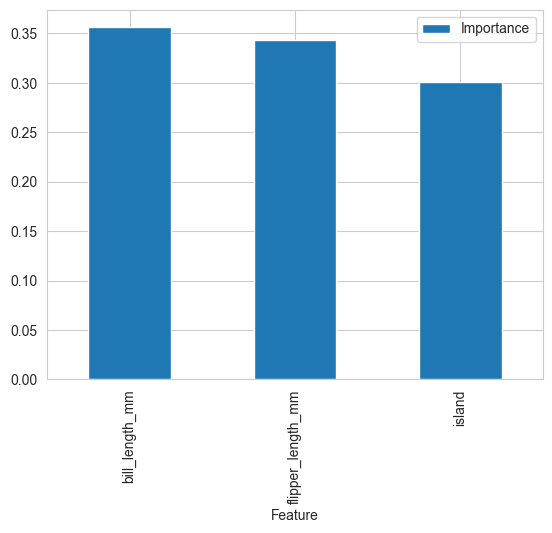

In [26]:
best_features = columns_after_data_cleaning_feat_eng[best_pipeline['feat_selection'].get_support()].to_list()


# create DataFrame to display feature importance
df_feature_importance = (pd.DataFrame(data={
          'Feature': best_features,
          'Importance': best_pipeline['model'].feature_importances_})
  .sort_values(by='Importance', ascending=False)
  )

# Most important features statement and plot
print(f"* These are the {len(best_features)} most important features in descending order. "
      f"The model was trained on them: \n{df_feature_importance['Feature'].to_list()}")

df_feature_importance.plot(kind='bar',x='Feature',y='Importance')
plt.show()


Finally, we evaluate the pipeline as usual with our custom function for classification tasks.


In [27]:
from sklearn.metrics import classification_report, confusion_matrix

def confusion_matrix_and_report(X,y,pipeline,label_map):

  prediction = pipeline.predict(X)

  print('---  Confusion Matrix  ---')
  print(pd.DataFrame(confusion_matrix(y_true=prediction, y_pred=y),
        columns=[ ["Actual " + sub for sub in label_map] ], 
        index= [ ["Prediction " + sub for sub in label_map ]]
        ))
  print("\n")


  print('---  Classification Report  ---')
  print(classification_report(y, prediction),"\n")


def clf_performance(X_train,y_train,X_test,y_test,pipeline,label_map):
  print("#### Train Set #### \n")
  confusion_matrix_and_report(X_train,y_train,pipeline,label_map)

  print("#### Test Set ####\n")
  confusion_matrix_and_report(X_test,y_test,pipeline,label_map)


We pass in the arguments we are familiar with.
* Note the performance on the test set is the same as in the train set.
* for label_map, we get the classes name with .unique()


In [28]:
clf_performance(X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                pipeline=best_pipeline,
                label_map= df_clf['species'].unique() 
                # In this case, the target variable is encoded as categories and we
                # get the values with .unique() 
                )


#### Train Set #### 

---  Confusion Matrix  ---
                     Actual Adelie Actual Chinstrap Actual Gentoo
Prediction Adelie              121                0             0
Prediction Chinstrap             0               51             0
Prediction Gentoo                0                0           103


---  Classification Report  ---
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       121
   Chinstrap       1.00      1.00      1.00        51
      Gentoo       1.00      1.00      1.00       103

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275
 

#### Test Set ####

---  Confusion Matrix  ---
                     Actual Adelie Actual Chinstrap Actual Gentoo
Prediction Adelie               31                0             0
Prediction Chinstrap             0               17             0
Prediction Gentoo        

---


### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png">  Refit only with the most important features


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%209-%20Well%20done.png"> Now you know which algorithm and which hyperparameters best fit your data. 
* That is awesome! Look at your improvement and what you achieved so far.
* However, your pipeline needs six columns, and your model needs only three to predict. That means if you deploy this pipeline, your system will manage six inputs, when in fact you only need three.
* That happens because we consider a feature selection step, which is useful for determining the most appropriate features for the algorithm.

<img width="3%" height="3%" align="top"  src=" https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Tips.png
">
  In practical terms, you don't need the features that got dropped by the feature selection step. Once you know which features you can ignore, **you can fit a new pipeline with only the most important features**.
* This new pipeline will be deployed and contains an algorithm and hyperparameters that best suit your data and has the correct number of features.
These are the most important features according to the previous analysis.


In [29]:
best_features


['island', 'bill_length_mm', 'flipper_length_mm']

We will use the same workflow, but now using the `best_features` only  for the train and test sets.
We split the data into train and test sets.


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(
                                    df_clf.drop(['species'],axis=1),
                                    df_clf['species'],
                                    test_size=0.2,
                                    random_state=101
                                    )

print("* Train set:", X_train.shape, y_train.shape, "\n* Test set:",  X_test.shape, y_test.shape)


* Train set: (275, 6) (275,) 
* Test set: (69, 6) (69,)


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> And subset the `best_features` !!!


In [31]:
X_train = X_train.filter(best_features)
X_test = X_test.filter(best_features)

print("* Train set:", X_train.shape, y_train.shape, "\n* Test set:", X_test.shape, y_test.shape)
X_train.head(3)


* Train set: (275, 3) (275,) 
* Test set: (69, 3) (69,)


,island,bill_length_mm,flipper_length_mm
336,Biscoe,44.5,217.0
32,Dream,39.5,188.0
39,Dream,39.8,184.0


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> You will need to update your pipeline since you have fewer variables to consider and you don't need feature selection.
* Before you had three steps for data cleaning and feature engineering.
* Now, you have two steps: one for median imputation and another for categorical encoding.


In [32]:
from sklearn.pipeline import Pipeline

### Data Cleaning and Feature Engineering
from feature_engine.imputation import MeanMedianImputer
from feature_engine.encoding import OrdinalEncoder

### Feat Scaling
from sklearn.preprocessing import StandardScaler

### ML algorithms 
from sklearn.ensemble import ExtraTreesClassifier


def PipelineOptimization(model):
  pipeline_base = Pipeline([
      ( 'median',  MeanMedianImputer(imputation_method='median',
                                     variables=['bill_length_mm' , 'flipper_length_mm']) ),

      ( "ordinal",OrdinalEncoder(encoding_method='arbitrary', variables = ['island']) ), 

      ("feat_scaling", StandardScaler() ),

      # no feature selection!!!

      ("model", model ),


    ])

  return pipeline_base




We now list the model that performed best, in this case, ExtraTreesClassifier.


In [33]:
models_search = {
    "ExtraTreesClassifier":ExtraTreesClassifier(random_state=0),
}
models_search


{'ExtraTreesClassifier': ExtraTreesClassifier(random_state=0)}

We will need to hardcode the best parameters, so let's remind ourselves of the best params.


In [34]:
grid_search_pipelines[best_model].best_params_


{'model__n_estimators': 20}

We need to parse the value between brackets `[ ]`


In [35]:
params_search = {
    "ExtraTreesClassifier":{'model__n_estimators': [20]
                            },

}
params_search


{'ExtraTreesClassifier': {'model__n_estimators': [20]}}

We fit the model using `HyperparameterOptimizationSearch` considering the model "ExtraTreeClassifier" and the parameters we set previously.
* The goal here is not to do a hyperparameter optimisation search, but instead to fit a pipeline using the algorithm and best hyperparameter configuration we discovered.


In [36]:
search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(X_train, y_train,
           scoring='accuracy',
           n_jobs=-1,
           cv=2)



Running GridSearchCV for ExtraTreesClassifier 

Fitting 2 folds for each of 1 candidates, totalling 2 fits


As usual, we check the search summary with the method .score_summary()
* Note the performance is the same as the previous pipeline.


In [37]:
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary


,estimator,min_score,mean_score,max_score,std_score,model__n_estimators
0,ExtraTreesClassifier,0.978102,0.978182,0.978261,0.000079,20


We get the best model programmatically.


In [38]:
best_model = grid_search_summary.iloc[0,0]
best_model


'ExtraTreesClassifier'

So we can grab the pipeline.


In [39]:
best_pipeline = grid_search_pipelines[best_model].best_estimator_
best_pipeline


Pipeline(steps=[('median',
                 MeanMedianImputer(variables=['bill_length_mm',
                                              'flipper_length_mm'])),
                ('ordinal',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['island'])),
                ('feat_scaling', StandardScaler()),
                ('model',
                 ExtraTreesClassifier(n_estimators=20, random_state=0))])

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> The best pipeline is a tree-based algorithm so that we can check the most important features with `.feature_importances_`
* The code is similar to the previous section. The difference is that now we don't have three steps in the pipeline related to data cleaning and feature engineering. Instead, we have two steps.


In [41]:
data_cleaning_feat_eng_steps = 2

columns_after_data_cleaning_feat_eng = (Pipeline(best_pipeline.steps[:data_cleaning_feat_eng_steps])
                                        .transform(X_train)
                                        .columns)


* These are the 3 most important features in descending order. The model was trained on them: 
['bill_length_mm', 'flipper_length_mm', 'island']


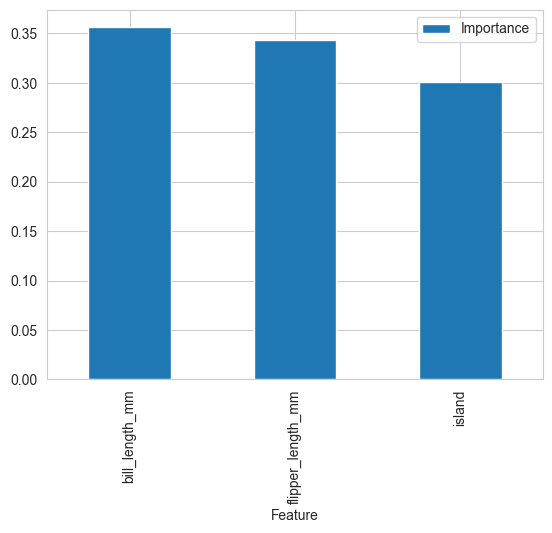

In [43]:
best_features = columns_after_data_cleaning_feat_eng


# create DataFrame to display feature importance
df_feature_importance = (pd.DataFrame(data={
          'Feature': best_features,
          'Importance': best_pipeline['model'].feature_importances_})
  .sort_values(by='Importance', ascending=False)
  )

# Most important features statement and plot
print(f"* These are the {len(best_features)} most important features in descending order. "
      f"The model was trained on them: \n{df_feature_importance['Feature'].to_list()}")

df_feature_importance.plot(kind='bar',x='Feature',y='Importance')
plt.show()

      


We parse the arguments we are familiar with to evaluate the classifier's performance.
* Note the performance from this pipeline is the same as from the previous pipeline - as we should expect!


In [44]:
clf_performance(X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                pipeline=best_pipeline,
                label_map= df_clf['species'].unique() 
                # In this case, the target variable is encoded as categories and we
                # get the values with .unique()
                )


#### Train Set #### 

---  Confusion Matrix  ---
                     Actual Adelie Actual Chinstrap Actual Gentoo
Prediction Adelie              121                0             0
Prediction Chinstrap             0               51             0
Prediction Gentoo                0                0           103


---  Classification Report  ---
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       121
   Chinstrap       1.00      1.00      1.00        51
      Gentoo       1.00      1.00      1.00       103

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275
 

#### Test Set ####

---  Confusion Matrix  ---
                     Actual Adelie Actual Chinstrap Actual Gentoo
Prediction Adelie               31                0             0
Prediction Chinstrap             0               17             0
Prediction Gentoo        

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%209-%20Well%20done.png"> Well done!
* In this notebook, you learned how to conduct a hyperparameter optimisation search fitting multiple algorithms with the best features that predict a penguin's species.
---


### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png">  Bonus: Most common Hyperparameters for the algorithms we cover in the course


<img width="3%" height="3%" align="top"  src=" https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Tips.png
">
 It will take **time and experience** to learn which hyperparameters to consider when optimising your pipeline and which values would make sense to tune.
* The key is to understand how the algorithm works, and that will take time and experience. We offer the most common hyperparameters for the algorithms we cover in the course. You can use them as a starting point and as a reference if you require them for your personal projects or in the workplace. 
* Once again, the **library documentation** is your best friend to instruct you on the available hyperparameters the library offers for that given algorithm.


* The hyperparameters we list here are a suggestion so that you can use them as a reference when you start fine-tuning your ML pipelines.
---
<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%206%20-%20Warning.png"> We will write the hyperparameters for all algorithms using the same dictionary structure we saw over the notebook, assuming you are arranging everything into a pipeline and the last step is called `'model'`


In [45]:
#### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Linear Regression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

#Linear Regression doesn't have hyperparameters. It would help if you parsed an empty dictionary
params_search = {
    "LinearRegression":{},
}



#### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Logistic Regression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [ ]:
from sklearn.linear_model import LogisticRegression 

params_search = {
    "LogisticRegression":{'model__penalty': ["l2","l1", "elasticnet"],
                          'model__C': [1, 0.5, 2],
                          'model__tol': [1e-4,1e-3,1e-5],
                            }
  }


#### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Decision Tree
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [ ]:
from sklearn.tree import DecisionTreeClassifier

params_search = {
    "DecisionTreeClassifier":{'model__max_depth': [None,4, 15],
                              'model__min_samples_split': [2,50],
                              'model__min_samples_leaf': [1,50],
                              'model__max_leaf_nodes': [None,50],
                            }
  }
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
from sklearn.tree import DecisionTreeRegressor


params_search = {
    "DecisionTreeRegressor":{'model__max_depth': [None,4, 15],
                             'model__min_samples_split': [2,50],
                             'model__min_samples_leaf': [1,50],
                             'model__max_leaf_nodes': [None,50],
                            }
  }


#### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Random Forest
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html


In [ ]:
from sklearn.ensemble import RandomForestRegressor

params_search = {
    "RandomForestRegressor":{'model__n_estimators': [100,50, 140],
                             'model__max_depth': [None,4, 15],
                             'model__min_samples_split': [2,50],
                             'model__min_samples_leaf': [1,50],
                             'model__max_leaf_nodes': [None,50],
                            }
  }

# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

params_search = {
    "RandomForestClassifier":{'model__n_estimators': [100,50,140],
                             'model__max_depth': [None,4, 15],
                             'model__min_samples_split': [2,50],
                             'model__min_samples_leaf': [1,50],
                             'model__max_leaf_nodes': [None,50],
                            }
  }



#### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Gradient Boosting
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier 

params_search = {
    "GradientBoostingClassifier":{'model__n_estimators': [100,50,140],
                                  'model__learning_rate':[0.1, 0.01, 0.001],
                                  'model__max_depth': [3,15, None],
                                  'model__min_samples_split': [2,50],
                                  'model__min_samples_leaf': [1,50],
                                  'model__max_leaf_nodes': [None,50],
                            }
  }

# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
from sklearn.ensemble import GradientBoostingRegressor

params_search = {
    "GradientBoostingRegressor":{'model__n_estimators': [100,50,140],
                                  'model__learning_rate':[0.1, 0.01, 0.001],
                                  'model__max_depth': [3,15, None],
                                  'model__min_samples_split': [2,50],
                                  'model__min_samples_leaf': [1,50],
                                  'model__max_leaf_nodes': [None,50],
                            }
  }




####  <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Ada Boost
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

params_search = {
    "AdaBoostClassifier":{'model__n_estimators': [50,25,80,150],
                          'model__learning_rate':[1,0.1, 2],
                            }
  }


# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html
from sklearn.ensemble import AdaBoostRegressor

params_search = {
    "AdaBoostRegressor":{'model__n_estimators': [50,25,80,150],
                          'model__learning_rate':[1,0.1, 2],
                          'model__loss':['linear', 'square', 'exponential'],
                            }
  }



####  <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> XG Boost
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn


In [ ]:
from xgboost import XGBRegressor

params_search = {
    "XGBRegressor":{'model__n_estimators': [30,80,200],
                    'model__max_depth': [None, 3, 15],
                    'model__learning_rate': [0.01,0.1,0.001],
                    'model__gamma': [0, 0.1],
                            }
  }

from xgboost import XGBClassifier

params_search = {
    "XGBClassifier":{'model__n_estimators': [30,80,200],
                      'model__max_depth': [None, 3, 15],
                      'model__learning_rate': [0.01,0.1,0.001],
                      'model__gamma': [0, 0.1],
                            }
  }



#### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> ExtraTree
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

params_search = {
    "ExtraTreesClassifier":{'model__n_estimators': [100,50,150],
                          'model__max_depth': [None, 3, 15],
                          'model__min_samples_split': [2, 50],
                          'model__min_samples_leaf': [1,50],
                            }
  }

# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html
from sklearn.ensemble import ExtraTreesRegressor


params_search = {
    "ExtraTreesRegressor":{'model__n_estimators': [100,50,150],
                          'model__max_depth': [None, 3, 15],
                          'model__min_samples_split': [2, 50],
                          'model__min_samples_leaf': [1,50],
                            }
  }


